In [1]:
# import statements

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def cleanSpectra(w, f, length, start=0):
    w = w[start:length+start]
    f = f[start:length+start]    
    fnorm = f/np.linalg.norm(f)
    return(w, fnorm)

In [3]:
# read in spectral data

fileList = ["LS1_20211119f_1", "LS1_20220501f_1", "LS2_20211119f_1", "LS3_20211119f_2", "LS3_20211119f_3",
           "LS4_20211119f_1", "LS4_20211119f_2", "LS5_20211119f_2"]

fileNames, SCfileNames = [],[]
for i in range(len(fileList)):
    fileNames.append("../Data/Initial_M33_Regs/M33_" + fileList[i]+ ".spec")
    SCfileNames.append("../Data/StarlightModeling/M33_" + fileList[i]+ ".spec.SP")


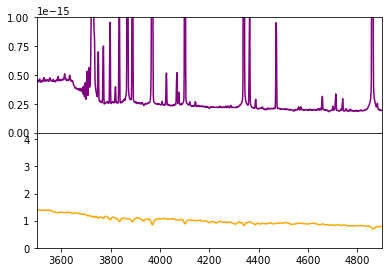

In [4]:
for i in range(0,1):
    # get spectra 
    wave, flux, err, weight = np.loadtxt(fileNames[i], unpack=True)
    waveSP, fluxDup, fluxSP, weightSP = np.loadtxt(SCfileNames[i], unpack=True)
    fig = plt.figure()
    ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4])
    ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
    ax1.plot(wave[300:300+len(fluxSP)], flux[300:300+len(fluxSP)], color="purple", label = "Ob Spectrum")
    ax2.plot(waveSP, fluxSP, color="orange", label = "Stellar Spectrum")
    ax1.set_xlim(3500,4900)
    ax1.set_ylim(0,0.000000000000001)
    ax2.set_xlim(3500,4900)
    ax2.set_ylim(0,4.25)

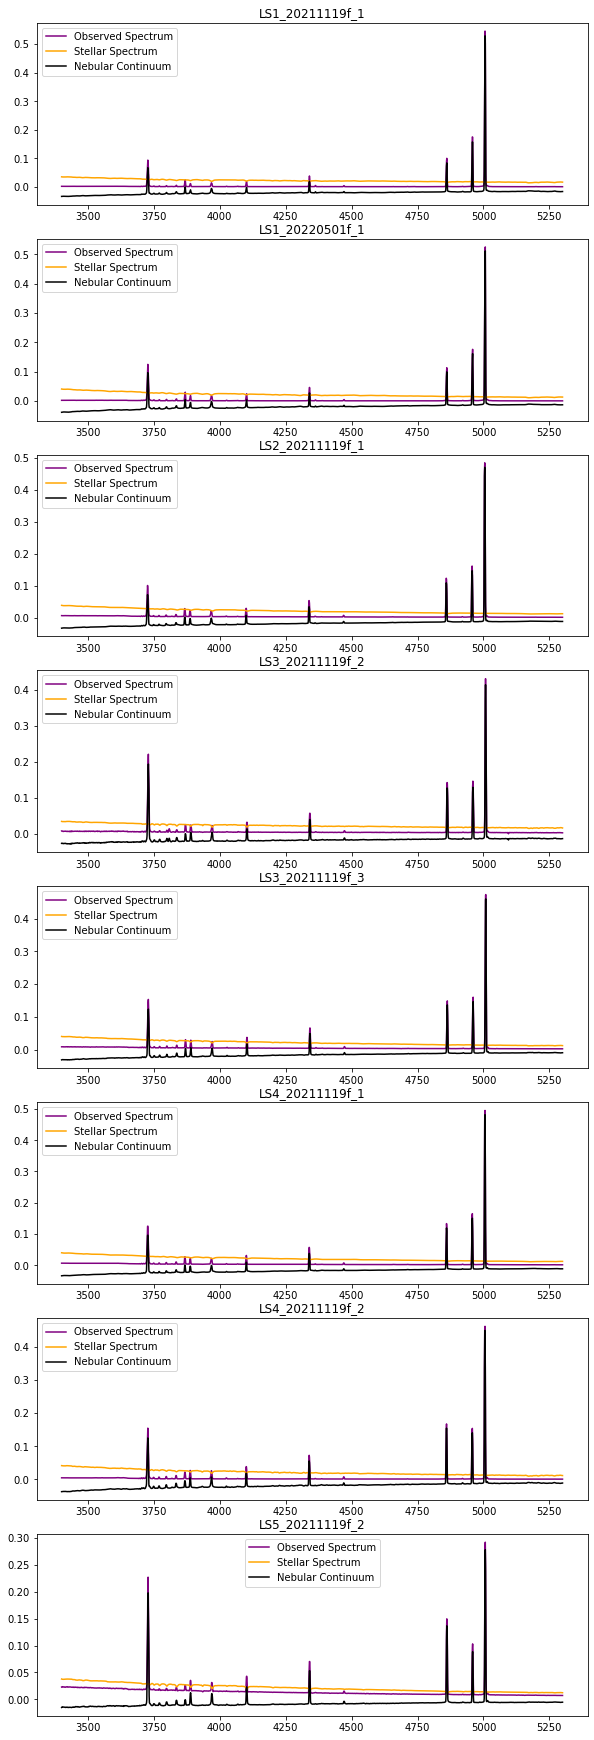

In [7]:
obW,obF,spW,spF,neb = [],[],[],[],[]

for i in range(len(fileNames)):
    # get spectra 
    wave, flux, err, weight = np.loadtxt(fileNames[i], unpack=True)
    waveSP, fluxDup, fluxSP, weightSP = np.loadtxt(SCfileNames[i], unpack=True)

    #normalize spectra
    wave, flux = cleanSpectra(wave,flux,len(fluxSP),start=300)
    waveSP,fluxSP = cleanSpectra(waveSP,fluxSP,len(fluxSP))
    nebular = flux-fluxSP
    
    obW.append(wave)
    obF.append(flux)
    spW.append(waveSP)
    spF.append(fluxSP)
    neb.append(nebular)
    

fig,ax = plt.subplots(len(fileNames),1,figsize=(8,24))

for i in range(len(fileNames)):
    
    ax[i].plot(obW[i], obF[i], color="purple", label = "Observed Spectrum")
    ax[i].plot(spW[i], spF[i], color="orange", label = "Stellar Spectrum")
    ax[i].plot(obW[i], neb[i], color="black", label = "Nebular Continuum")
    ax[i].legend(loc='best')
    ax[i].set_title(fileList[i])
    
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/FullSpectrumComparison.png", dpi=300)
plt.close()

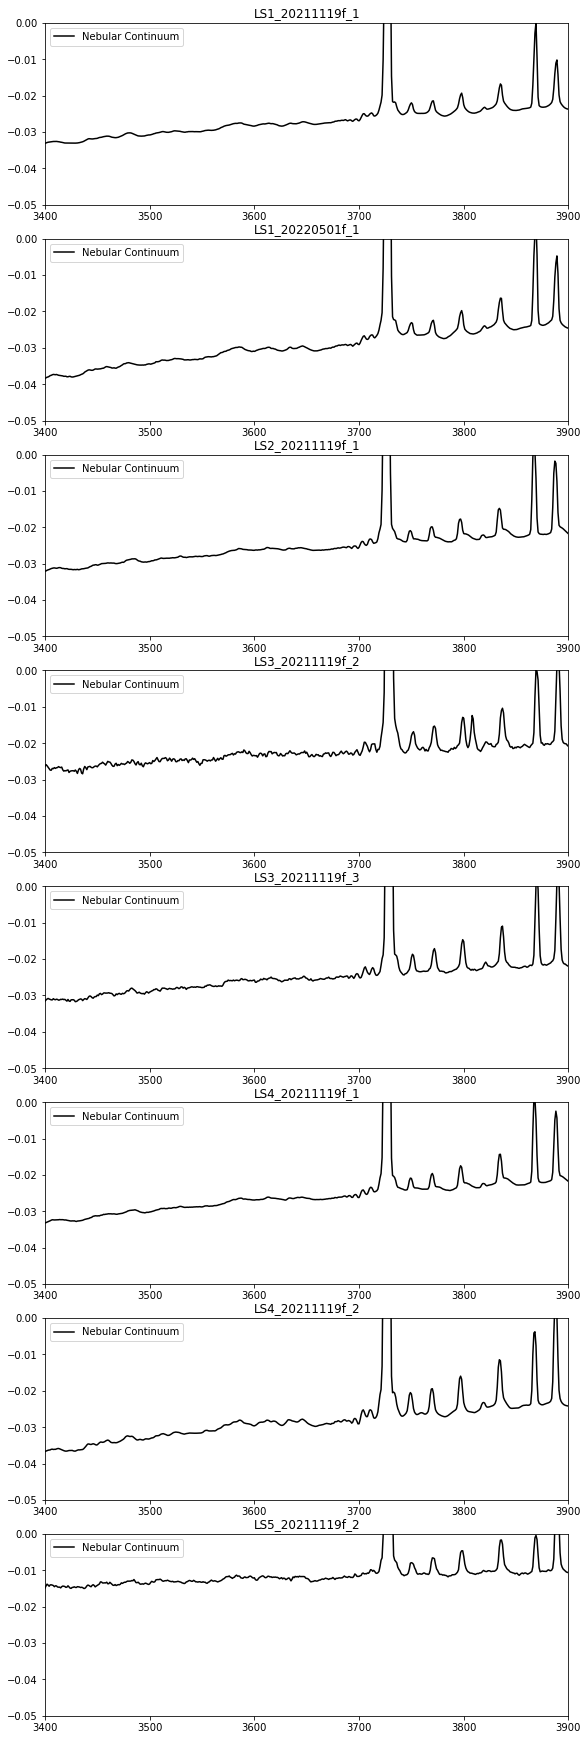

In [10]:

fig,ax = plt.subplots(len(fileNames),1,figsize=(8,24))

for i in range(len(fileNames)):
    

    ax[i].plot(obW[i], neb[i], color="black", label = "Nebular Continuum")
    ax[i].legend(loc='best')
    ax[i].set_title(fileList[i])
    ax[i].set_xlim(3400,3900)
    ax[i].set_ylim(-0.05,0)
    
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/NebularContinuum.png", dpi=300)
plt.close()